In [7]:
!pip install pandas numpy scikit-learn

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [9]:
!git clone https://github.com/Ardavaa/GDG-feature-eng-data-prep.git

Cloning into 'GDG-feature-eng-data-prep'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 7.72 MiB | 6.44 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

In [39]:
df_chn = pd.read_csv('STP.csv')

df_chn.head(10)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target),index
0,0,GP,F,NaN,U,GT3,A,4.0,-inf,at_home,...,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0,0
1,1,GP,F,-,U,GT3,T,1.0,1.0,at_home,...,3.0,3.0,-,NaN,3.0,2.0,9.0,-inf,11.0,1
2,2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,...,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0,2
3,3,GP,F,15.0,U,GT3,T,4.0,NaN,health,...,NaN,NaN,1.0,1.0,5.0,0.0,NaN,inf,NaN,3
4,4,GP,F,16.0,U,GT3,T,3.0,3.0,other,...,-inf,2.0,inf,2.0,5.0,0.0,NaN,13.0,13.0,4
5,5,GP,M,16.0,U,LE3,T,4.0,3.0,services,...,4.0,2.0,1.0,NaN,NaN,6.0,12.0,12.0,13.0,5
6,6,GP,M,-inf,U,LE3,T,2.0,2.0,other,...,4.0,4.0,1.0,1.0,3.0,0.0,13.0,12.0,13.0,6
7,7,GP,F,17.0,U,GT3,A,4.0,NaN,other,...,1.0,4.0,NaN,-,1.0,2.0,10.0,13.0,13.0,7
8,8,GP,M,15.0,U,LE3,A,NaN,-,services,...,2.0,2.0,1.0,1.0,inf,0.0,15.0,NaN,17.0,8
9,9,GP,M,15.0,U,GT3,T,NaN,4.0,other,...,5.0,1.0,inf,NaN,NaN,0.0,12.0,12.0,13.0,9


In [40]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1044 non-null   int64 
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         928 non-null    object
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        919 non-null    object
 8   Fedu        928 non-null    object
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  922 non-null    object
 14  studytime   920 non-null    object
 15  failures    922 non-null    object
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

In [41]:
cols_to_remove = ['school', 'Unnamed: 0','index']

In [42]:
df_chn.drop(cols_to_remove, axis=1, inplace=True)

In [43]:
df_chn.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target)
0,F,NaN,U,GT3,A,4.0,-inf,at_home,teacher,course,...,4.0,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,F,-,U,GT3,T,1.0,1.0,at_home,other,course,...,5.0,3.0,3.0,-,NaN,3.0,2.0,9.0,-inf,11.0
2,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,...,4.0,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0
3,F,15.0,U,GT3,T,4.0,NaN,health,services,home,...,3.0,NaN,NaN,1.0,1.0,5.0,0.0,NaN,inf,NaN
4,F,16.0,U,GT3,T,3.0,3.0,other,other,home,...,4.0,-inf,2.0,inf,2.0,5.0,0.0,NaN,13.0,13.0


In [44]:
fix_cols = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3(Target)']

In [45]:
df_chn[fix_cols] = df_chn[fix_cols].apply(pd.to_numeric, errors='coerce')

In [46]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         1044 non-null   object 
 1   age         899 non-null    float64
 2   address     1044 non-null   object 
 3   famsize     1044 non-null   object 
 4   Pstatus     1044 non-null   object 
 5   Medu        891 non-null    float64
 6   Fedu        897 non-null    float64
 7   Mjob        1044 non-null   object 
 8   Fjob        1044 non-null   object 
 9   reason      1044 non-null   object 
 10  guardian    1044 non-null   object 
 11  traveltime  899 non-null    float64
 12  studytime   893 non-null    float64
 13  failures    897 non-null    float64
 14  schoolsup   1044 non-null   object 
 15  famsup      1044 non-null   object 
 16  paid        1044 non-null   object 
 17  activities  1044 non-null   object 
 18  nursery     1044 non-null   object 
 19  higher      1044 non-null  

In [47]:
df_chn.isna().sum()

,0
sex,0
age,145
address,0
famsize,0
Pstatus,0
Medu,153
Fedu,147
Mjob,0
Fjob,0
reason,0


In [48]:
df_chn.duplicated().sum()

0

In [66]:
num_cols = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']

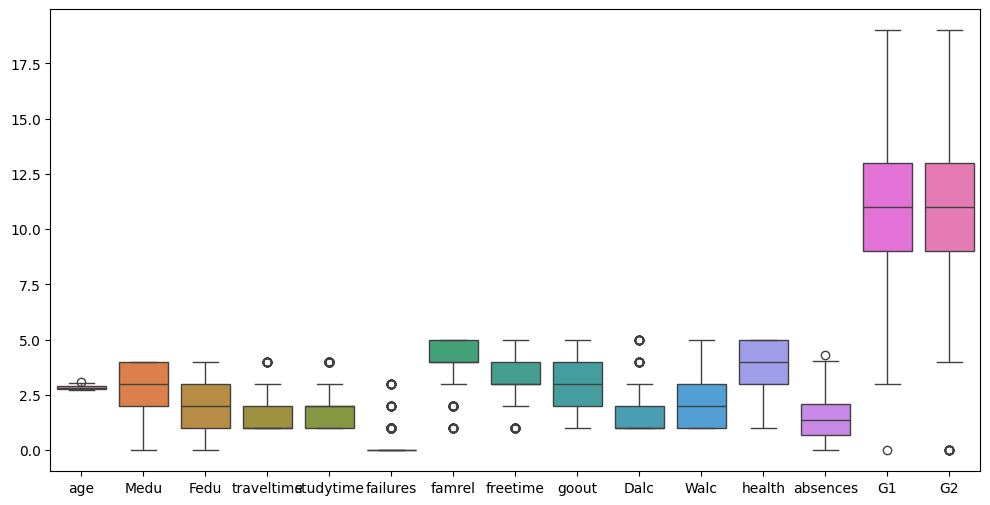

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_chn[num_cols])
plt.show()

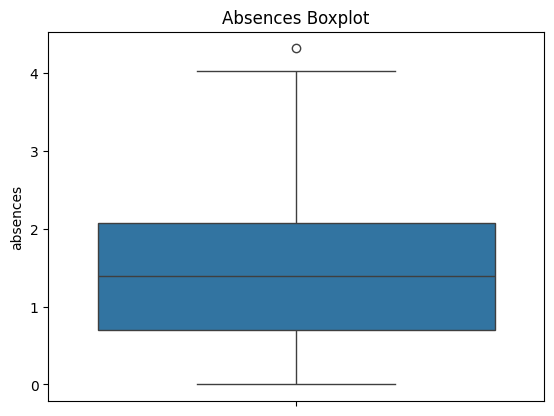

In [68]:
sns.boxplot(data=df_chn['absences'])
plt.title('Absences Boxplot')
plt.show()

In [69]:
df_chn.replace([np.inf, -np.inf], np.nan, inplace=True)

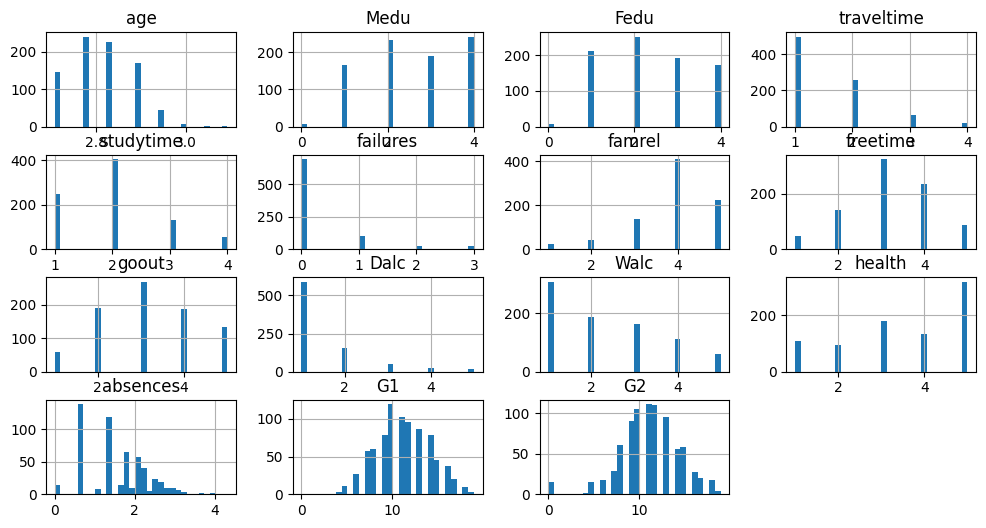

In [70]:
df_chn[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

In [71]:
df_chn['absences'] = np.log(df_chn['absences'])

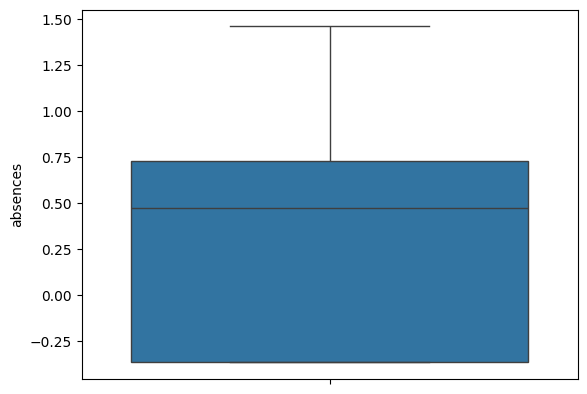

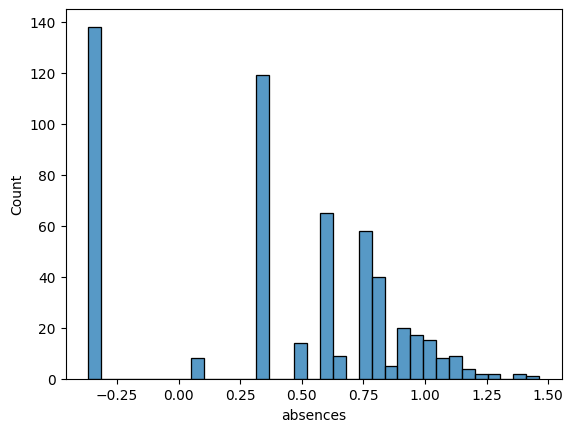

In [72]:
sns.boxplot(df_chn['absences'])
plt.show()

sns.histplot(df_chn['absences'], bins=35)
plt.show()

In [73]:
X = df_chn.drop('G3(Target)', axis=1)
y = df_chn['G3(Target)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((835, 31), (209, 31), (835,), (209,))

In [74]:
df_chn.isna().sum()

,0
sex,0
age,208
address,0
famsize,0
Pstatus,0
Medu,208
Fedu,208
Mjob,0
Fjob,0
reason,0


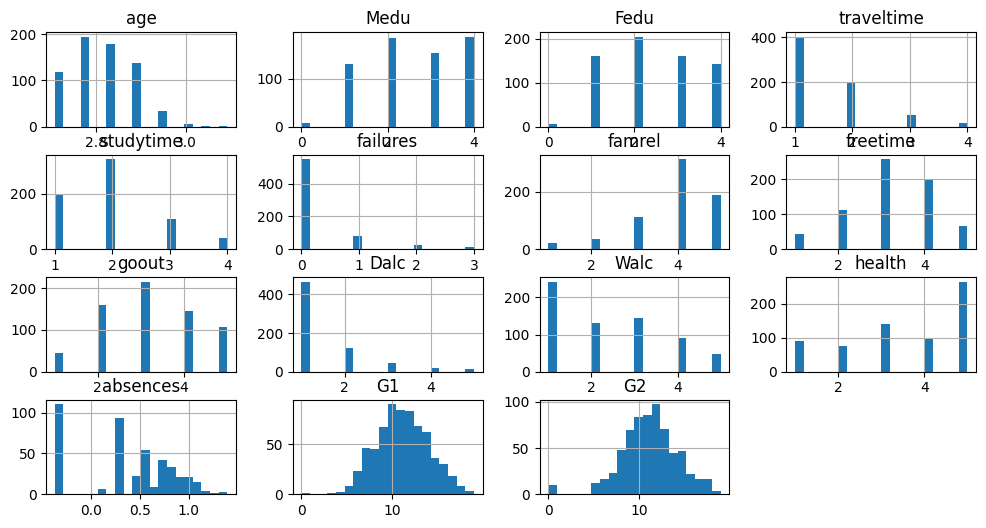

In [78]:
median_absences = X_train['absences'][np.isfinite(X_train['absences'])].median()
X_train['absences'] = X_train['absences'].replace([np.inf, -np.inf], median_absences)
X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

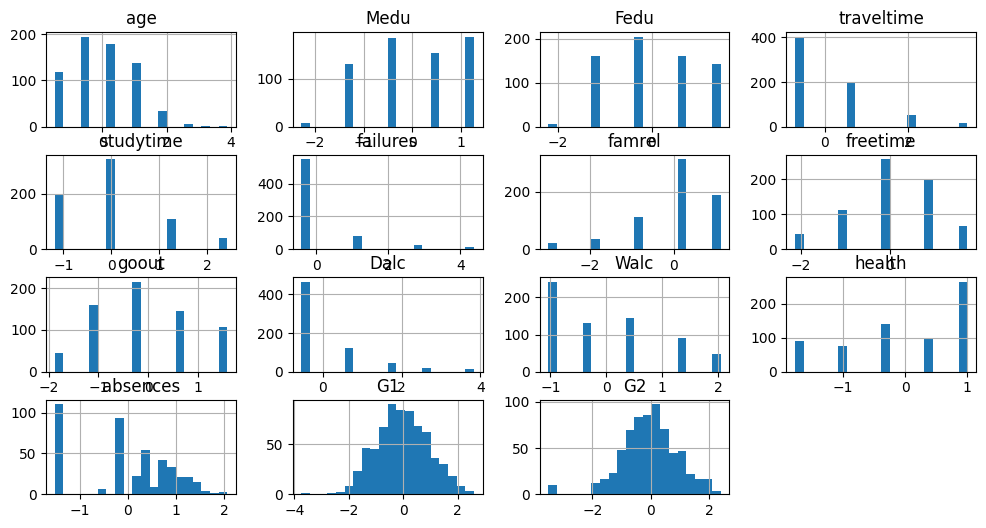

In [81]:
median_absences = X_train['absences'][np.isfinite(X_train['absences'])].median()
X_test['absences'] = X_test['absences'].replace([np.inf, -np.inf], median_absences)
for col in num_cols:
    median_val = X_train[col][np.isfinite(X_train[col])].median()
    X_test[col] = X_test[col].replace([np.inf, -np.inf], median_val)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

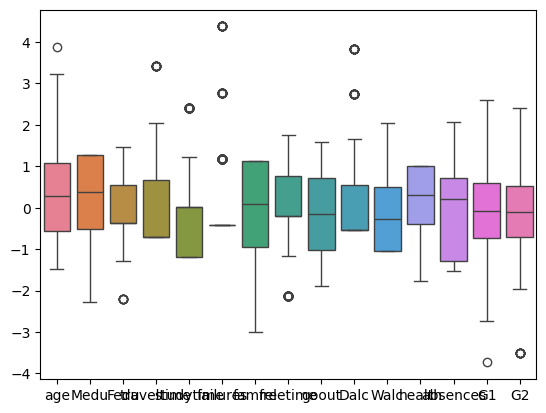

In [82]:
sns.boxplot(data=X_train[num_cols])
plt.show()

In [83]:
X_train.isna().sum() / len(X_train)

,0
sex,0.000000
age,0.198802
address,0.000000
famsize,0.000000
Pstatus,0.000000
Medu,0.203593
Fedu,0.192814
Mjob,0.000000
Fjob,0.000000
reason,0.000000


In [84]:
X_test.isna().sum() / len(X_test)

,0
sex,0.000000
age,0.200957
address,0.000000
famsize,0.000000
Pstatus,0.000000
Medu,0.181818
Fedu,0.224880
Mjob,0.000000
Fjob,0.000000
reason,0.000000


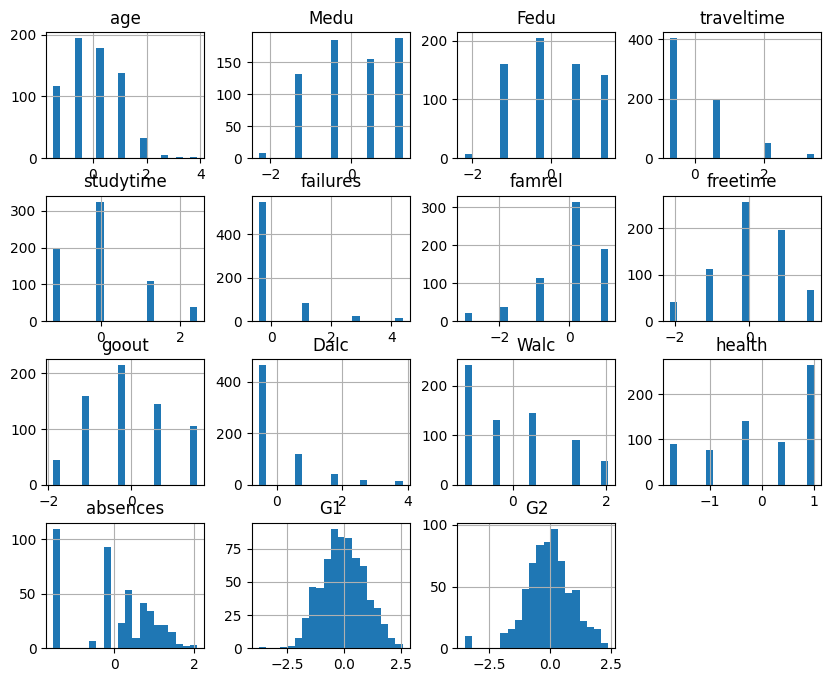

In [87]:
X_train[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']].hist(bins=20, figsize=(10, 8))
plt.show()

In [89]:
X_train['G1'].skew(), X_train['G2'].skew(), X_train['age'].skew()

(0.032775352852465654, -0.39014155808207346, 0.2718578631420922)

In [93]:
X_train['G1'].fillna(X_train['G1'].median(), inplace=True)
X_test['G1'].fillna(X_test['G1'].median(), inplace=True)

X_train['G2'].fillna(X_train['G2'].mean(), inplace=True)
X_test['G2'].fillna(X_test['G2'].mean(), inplace=True)

X_train['age'].fillna(X_train['age'].mean(), inplace=True)
X_test['age'].fillna(X_test['age'].mean(), inplace=True)

X_train['Medu'].fillna(X_train['Medu'].median(), inplace=True)
X_test['Medu'].fillna(X_test['Medu'].median(), inplace=True)

X_train['Fedu'].fillna(X_train['Fedu'].mean(), inplace=True)
X_test['Fedu'].fillna(X_test['Fedu'].mean(), inplace=True)

X_train['traveltime'].fillna(X_train['traveltime'].mean(), inplace=True)
X_test['traveltime'].fillna(X_test['traveltime'].mean(), inplace=True)

X_train['studytime'].fillna(X_train['studytime'].median(), inplace=True)
X_test['studytime'].fillna(X_test['studytime'].median(), inplace=True)

X_train['failures'].fillna(X_train['failures'].mean(), inplace=True)
X_test['failures'].fillna(X_test['failures'].mean(), inplace=True)

X_train['famrel'].fillna(X_train['famrel'].mean(), inplace=True)
X_test['famrel'].fillna(X_test['famrel'].mean(), inplace=True)

X_train['freetime'].fillna(X_train['freetime'].median(), inplace=True)
X_test['freetime'].fillna(X_test['freetime'].median(), inplace=True)

X_train['goout'].fillna(X_train['goout'].mean(), inplace=True)
X_test['goout'].fillna(X_test['goout'].mean(), inplace=True)

X_train['Dalc'].fillna(X_train['Dalc'].mean(), inplace=True)
X_test['Dalc'].fillna(X_test['Dalc'].mean(), inplace=True)

X_train['Walc'].fillna(X_train['Walc'].median(), inplace=True)
X_test['Walc'].fillna(X_test['Walc'].median(), inplace=True)

X_train['health'].fillna(X_train['health'].mean(), inplace=True)
X_test['health'].fillna(X_test['health'].mean(), inplace=True)

X_train['absences'].fillna(X_train['absences'].mean(), inplace=True)
X_test['absences'].fillna(X_test['absences'].mean(), inplace=True)

In [94]:
X_train.isna().sum() / len(X_train)

,0
sex,0.0
age,0.0
address,0.0
famsize,0.0
Pstatus,0.0
Medu,0.0
Fedu,0.0
Mjob,0.0
Fjob,0.0
reason,0.0


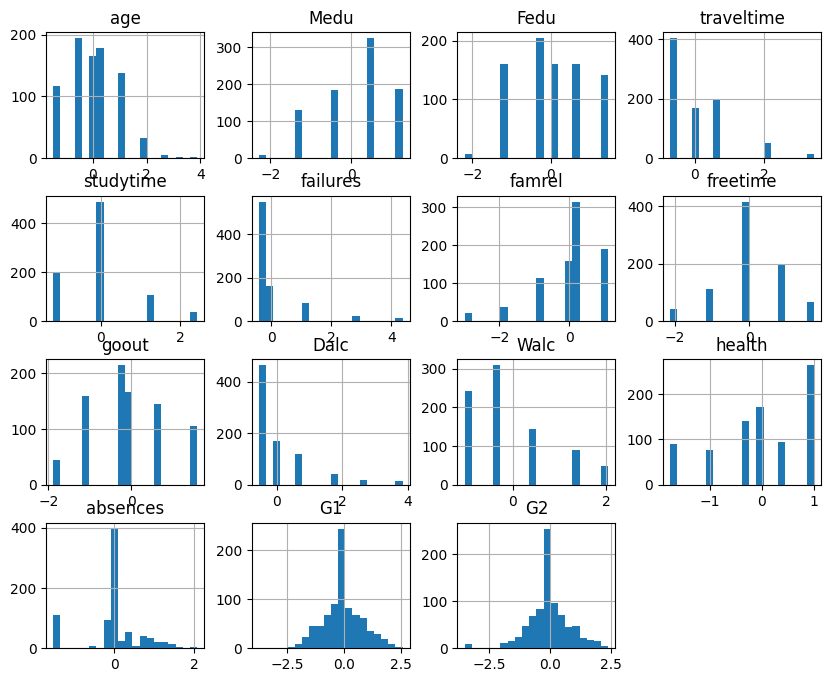

In [95]:
X_train[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']].hist(bins=20, figsize=(10, 8))
plt.show()

In [96]:
print(X_test.isna().sum())

sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64


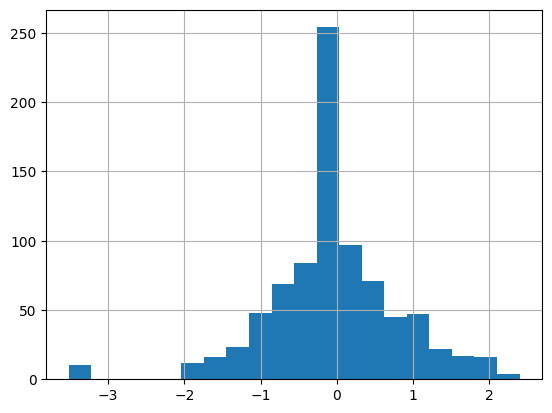

In [97]:
X_train['G2'].hist(bins=20)
plt.show()

In [98]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [99]:
print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
sex
F    473
M    362
Name: count, dtype: int64
--------------------------------------------------
address
U    612
R    223
Name: count, dtype: int64
--------------------------------------------------
famsize
GT3    584
LE3    251
Name: count, dtype: int64
--------------------------------------------------
Pstatus
T    736
A     99
Name: count, dtype: int64
--------------------------------------------------
Mjob
other       315
services    189
at_home     159
teacher     108
health       64
Name: count, dtype: int64
--------------------------------------------------
Fjob
other       468
services    237
teacher      53
at_home      43
health       34
Name: count, dtype: int64
--------------------------------------------------
reason
course        346
home          211
reputation    191
other          87
Name: count, dtype: int64
--------------------------------------------------
guardian
mother    584
father    192
other      59
Name: 

In [100]:
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
531,1.194859e-17,-1.393968,-1.284904,2.043434e+00,0.017835,-0.415933,1.121080,-2.130830,1.062097e-17,-1.335607e-17,...,True,False,False,False,False,False,True,True,True,True
256,1.077615e+00,-0.507746,-0.369444,-1.065281e-17,-1.180645,1.181249,0.089991,0.777194,-1.428841e-01,5.534556e-01,...,False,True,False,True,False,True,False,False,True,True
350,1.194859e-17,-0.507746,-1.284904,-1.065281e-17,1.216314,1.181249,0.089991,-0.192148,-1.880875e+00,-5.419253e-01,...,True,False,False,False,False,True,True,True,True,True
60,-5.682062e-01,0.378477,1.461476,-7.072631e-01,0.017835,-0.415933,-1.972185,0.777194,7.261112e-01,-1.335607e-17,...,True,False,False,True,False,True,True,True,False,False
930,2.789218e-01,0.378477,-0.369444,-1.065281e-17,-1.180645,1.181249,0.089991,0.777194,7.261112e-01,1.648837e+00,...,True,False,False,False,False,False,True,True,True,False


In [101]:
X_train.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [117]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
17    174
6      99
7      93
9      80
8      68
11     57
10     45
4      43
5      41
0      31
12     28
13     25
14     15
2      13
3       8
1       7
15      7
16      1
Name: count, dtype: int64

Test Label 
19    34
14    29
11    28
10    25
12    17
13    13
16    11
8     11
9     10
0      8
15     6
18     5
7      4
6      3
17     3
5      1
4      1
Name: count, dtype: int64


In [118]:
X_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
531,1.194859e-17,-1.393968,-1.284904e+00,2.043434e+00,0.017835,-4.159328e-01,1.121080,-2.130830,1.062097e-17,-1.335607e-17,...,True,False,False,False,False,False,True,True,True,True
256,1.077615e+00,-0.507746,-3.694438e-01,-1.065281e-17,-1.180645,1.181249e+00,0.089991,0.777194,-1.428841e-01,5.534556e-01,...,False,True,False,True,False,True,False,False,True,True
350,1.194859e-17,-0.507746,-1.284904e+00,-1.065281e-17,1.216314,1.181249e+00,0.089991,-0.192148,-1.880875e+00,-5.419253e-01,...,True,False,False,False,False,True,True,True,True,True
60,-5.682062e-01,0.378477,1.461476e+00,-7.072631e-01,0.017835,-4.159328e-01,-1.972185,0.777194,7.261112e-01,-1.335607e-17,...,True,False,False,True,False,True,True,True,False,False
930,2.789218e-01,0.378477,-3.694438e-01,-1.065281e-17,-1.180645,1.181249e+00,0.089991,0.777194,7.261112e-01,1.648837e+00,...,True,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-1.470024e+00,1.264699,2.899099e-17,-7.072631e-01,0.017835,-4.159328e-01,1.121080,-0.192148,-1.428841e-01,-5.419253e-01,...,True,False,False,True,False,True,True,True,True,False
330,1.077615e+00,-0.507746,-1.284904e+00,6.680853e-01,0.017835,7.930164e-17,0.089991,-0.192148,-1.880875e+00,-5.419253e-01,...,True,False,False,False,False,True,True,True,True,True
466,-1.470024e+00,0.378477,-1.284904e+00,6.680853e-01,-1.180645,7.930164e-17,-0.941097,-0.192148,-1.428841e-01,-1.335607e-17,...,True,False,False,True,False,False,True,True,False,False
121,-1.470024e+00,-0.507746,-3.694438e-01,-1.065281e-17,2.414794,-4.159328e-01,1.121080,1.746535,1.062097e-17,-5.419253e-01,...,False,False,False,True,False,True,True,True,True,False


In [119]:
X_train['G3(Target)'] = y_train
X_test['G3(Target)'] = y_test

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 531 to 860
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                835 non-null    float64
 1   Medu               835 non-null    float64
 2   Fedu               835 non-null    float64
 3   traveltime         835 non-null    float64
 4   studytime          835 non-null    float64
 5   failures           835 non-null    float64
 6   famrel             835 non-null    float64
 7   freetime           835 non-null    float64
 8   goout              835 non-null    float64
 9   Dalc               835 non-null    float64
 10  Walc               835 non-null    float64
 11  health             835 non-null    float64
 12  absences           835 non-null    float64
 13  G1                 835 non-null    float64
 14  G2                 835 non-null    float64
 15  sex_M              835 non-null    bool   
 16  address_U          835 non-nu

In [121]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 971 to 1004
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                209 non-null    float64
 1   Medu               209 non-null    float64
 2   Fedu               209 non-null    float64
 3   traveltime         209 non-null    float64
 4   studytime          209 non-null    float64
 5   failures           209 non-null    float64
 6   famrel             209 non-null    float64
 7   freetime           209 non-null    float64
 8   goout              209 non-null    float64
 9   Dalc               209 non-null    float64
 10  Walc               209 non-null    float64
 11  health             209 non-null    float64
 12  absences           209 non-null    float64
 13  G1                 209 non-null    float64
 14  G2                 209 non-null    float64
 15  sex_M              209 non-null    bool   
 16  address_U          209 non-n

In [122]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())


Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
